# Representing HAN
This notebook explores ways to represent HAN in RMG

In [1]:
import os, sys
rmg_path = os.getenv('RMGpy')
if rmg_path not in sys.path:
    sys.path.append(rmg_path)
sys.path

import rmgpy
print(f"RMG-Py Version {rmgpy.__version__}")
print(rmgpy.__file__)

RMG-Py Version 3.0.0
/Users/rwest/Code/RMG-Py/rmgpy/__init__.py


In [2]:
from rmgpy.molecule import Molecule

RDKit WARNING: [09:52:42] Enabling RDKit 2019.09.1 jupyter extensions


These are the two forms of HAN, from Bannerjjee (2016), Ionic and Covalent. The Ionic form is marginally more stable, and the covalent form always becomes the ionic form when adsorbed on a metal.
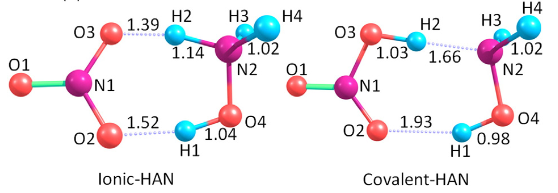

## Covalent HAN

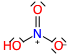

In [3]:
no3h = Molecule().from_adjacency_list("""
NO3h
1 O u0 p2 c0 {2,S} {5,S}
2 N u0 p0 c+1 {1,S} {3,S} {4,D}
3 O u0 p3 c-1 {2,S}
4 O u0 p2 c0 {2,D}
5 H u0 p0 c0 {1,S}
""")
no3h

In [4]:
nh2oh = Molecule().from_adjacency_list("""
NH2OH
1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 O u0 p2 c0 {1,S} {5,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}
""")
nh2oh

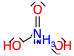

In [5]:
# This is the covalent form of HAN
no3h_h2noh =  Molecule().from_adjacency_list("""
no3h_h2noh
1  O u0 p3 c-1 {2,S} {10,H}
2  N u0 p0 c+1 {1,S} {3,D} {4,S}
3  O u0 p2 c0 {2,D}
4  O u0 p2 c0 {2,S} {7,S}
5  N u0 p1 c0 {6,S} {8,S} {9,S} {7,H}
6  O u0 p2 c0 {5,S} {10,S}
7  H u0 p0 c0 {4,S} {5,H}
8  H u0 p0 c0 {5,S}
9  H u0 p0 c0 {5,S}
10 H u0 p0 c0 {6,S} {1,H}
""")
no3h_h2noh
# the image is not drawn well because the H-bonds are ignored 
# and two halves end up superimposed on top of each other

In [6]:
no3h_h2noh.to_smiles()

'[O-][N+](=O)O.NO'

In [7]:
for a in no3h_h2noh.atoms:
    print(a, no3h_h2noh.get_bonds(a))

O {<Atom 'N'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">}
O {<Atom 'N+'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">}
O- {<Atom 'N+'>: <Bond "1.0">, <Atom 'H'>: <Bond "0.10000000149011612">}
O {<Atom 'N+'>: <Bond "2.0">}
N {<Atom 'O'>: <Bond "1.0">, <Atom 'H'>: <Bond "0.10000000149011612">, <Atom 'H'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">}
N+ {<Atom 'O-'>: <Bond "1.0">, <Atom 'O'>: <Bond "2.0">, <Atom 'O'>: <Bond "1.0">}
H {<Atom 'O'>: <Bond "1.0">, <Atom 'N'>: <Bond "0.10000000149011612">}
H {<Atom 'O-'>: <Bond "0.10000000149011612">, <Atom 'O'>: <Bond "1.0">}
H {<Atom 'N'>: <Bond "1.0">}
H {<Atom 'N'>: <Bond "1.0">}


## Ionic HAN

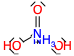

In [8]:
# This is the ionic form of HAN
no3_h3noh =  Molecule().from_adjacency_list("""
no3-_h3noh+
1  O u0 p3 c-1 {2,S} {10,H}
2  N u0 p0 c+1 {1,S} {3,D} {4,S}
3  O u0 p2 c0 {2,D}
4  O u0 p3 c-1 {2,S} {7,H}
5  N u0 p0 c+1 {6,S} {8,S} {9,S} {7,S}
6  O u0 p2 c0 {5,S} {10,S}
7  H u0 p0 c0 {4,H} {5,S}
8  H u0 p0 c0 {5,S}
9  H u0 p0 c0 {5,S}
10 H u0 p0 c0 {6,S} {1,H}
""")
no3_h3noh
# the image is not drawn well because the H-bonds are ignored 
# and two halves end up superimposed on top of each other

In [9]:
no3_h3noh.to_smiles()

'[O-][N+](=O)[O-].O[NH3+]'

In [10]:
for a in no3h_h2noh.atoms:
    print(a, no3h_h2noh.get_bonds(a))

O {<Atom 'N'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">}
O {<Atom 'N+'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">}
O- {<Atom 'N+'>: <Bond "1.0">, <Atom 'H'>: <Bond "0.10000000149011612">}
O {<Atom 'N+'>: <Bond "2.0">}
N {<Atom 'O'>: <Bond "1.0">, <Atom 'H'>: <Bond "0.10000000149011612">, <Atom 'H'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">}
N+ {<Atom 'O-'>: <Bond "1.0">, <Atom 'O'>: <Bond "2.0">, <Atom 'O'>: <Bond "1.0">}
H {<Atom 'O'>: <Bond "1.0">, <Atom 'N'>: <Bond "0.10000000149011612">}
H {<Atom 'O-'>: <Bond "0.10000000149011612">, <Atom 'O'>: <Bond "1.0">}
H {<Atom 'N'>: <Bond "1.0">}
H {<Atom 'N'>: <Bond "1.0">}


## Other Fragments

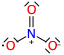

In [11]:
no3j = Molecule().from_adjacency_list("""
NO3j
1 O u1 p2 c0 {2,S}
2 N u0 p0 c+1 {1,S} {3,S} {4,D}
3 O u0 p3 c-1 {2,S}
4 O u0 p2 c0 {2,D}
""")
no3j